In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import folium
import scipy

In [2]:
df = pd.read_csv('data.csv')
df

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income
0,Albert Park,Melbourne,AUS,Australia,271800,296600,9,-37.814218,144.963161,50,5932.0,21329.0
1,Bahrain International Circuit,Sakhir,BHR,Bahrain,92000,93000,1,32.953941,65.540016,1,93000.0,47606.0
2,Baku City Circuit,Baku,AZE,Azerbaijan,30000,71541,138,40.375443,49.832675,31,2308.0,3851.0
3,Circuit de Barcelona-Catalunya,Montmeló,ESP,Spain,165029,177984,7,41.551519,2.248081,50,3560.0,13822.0
4,Circuit of the Americas,"Austin, TX",USA,United States,269889,258000,-4,30.271129,-97.743700,50,5160.0,25332.0
5,Autodromo Enzo e Dino Ferrari,Imola,ITA,Italy,147500,185000,25,44.353515,11.714123,36,5139.0,15547.0
6,Circuit Gilles Villeneuve,"Montréal, Quebec",CAN,Canada,300000,360000,19,45.503182,-73.569806,50,7200.0,22042.0
7,Autódromo Hermanos Rodríguez,Mexico City,MEX,Mexico,339967,337043,0,19.432630,-99.133178,50,6741.0,4929.0
8,Hungaroring,Mogyoród,HUN,Hungary,176000,199000,13,47.603742,19.247409,2,99500.0,8613.0
9,Autódromo José Carlos Pace,São Paulo,BRA,Brazil,136410,141218,3,-23.550651,-46.633382,50,2824.0,7654.0


Pearson’s correlation coefficient: -0.21821520036299064
2-tailed p-value: 0.38435695368102046


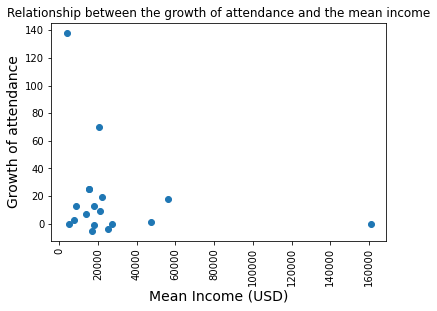

In [3]:
pearson = scipy.stats.pearsonr(df['Income'], df['Growth (%)'])
print("Pearson’s correlation coefficient: " + str(pearson[0]) + "\n2-tailed p-value: " + str(pearson[1]))

plt.scatter(df['Income'], df['Growth (%)'])
plt.xlabel('Mean Income (USD)', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Growth of attendance', fontsize=14)
plt.title('Relationship between the growth of attendance and the mean income')
plt.show()

Pearson’s correlation coefficient: -0.05917193104508474
2-tailed p-value: 0.8155858902234452


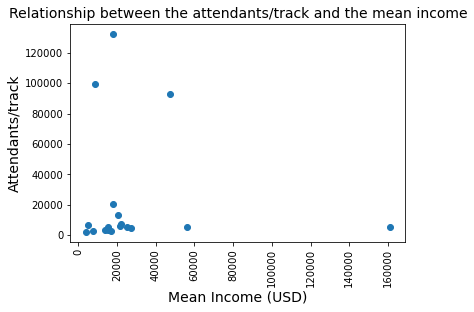

In [4]:
pearson = scipy.stats.pearsonr(df['Income'], df['Ratio'])
print("Pearson’s correlation coefficient: " + str(pearson[0]) + "\n2-tailed p-value: " + str(pearson[1]))

plt.scatter(df['Income'], df['Ratio'])
plt.xlabel('Mean Income (USD)', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Attendants/track', fontsize=14)
plt.title('Relationship between the attendants/track and the mean income', fontsize=14)
plt.show()

In [5]:
df['Income'] = df['Income'].astype(int)
df['Ratio'] = df['Ratio'].astype(int)

df['Growth (%)'] = ((df['Growth (%)'] - df['Growth (%)'].mean())/df['Growth (%)'].std(ddof=0))
df['Ratio'] = ((df['Ratio'] - df['Ratio'].mean())/df['Ratio'].std(ddof=0))
df['Income'] = ((df['Income'] - df['Income'].mean())/df['Income'].std(ddof=0))
df

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income
0,Albert Park,Melbourne,AUS,Australia,271800,296600,-0.279493,-37.814218,144.963161,50,-0.446447,-0.192445
1,Bahrain International Circuit,Sakhir,BHR,Bahrain,92000,93000,-0.517641,32.953941,65.540016,1,1.791964,0.563628
2,Baku City Circuit,Baku,AZE,Azerbaijan,30000,71541,3.560643,40.375443,49.832675,31,-0.539616,-0.695342
3,Circuit de Barcelona-Catalunya,Montmeló,ESP,Spain,165029,177984,-0.339030,41.551519,2.248081,50,-0.507428,-0.408445
4,Circuit of the Americas,"Austin, TX",USA,United States,269889,258000,-0.666484,30.271129,-97.743700,50,-0.466294,-0.077266
5,Autodromo Enzo e Dino Ferrari,Imola,ITA,Italy,147500,185000,0.196803,44.353515,11.714123,36,-0.466834,-0.358811
6,Circuit Gilles Villeneuve,"Montréal, Quebec",CAN,Canada,300000,360000,0.018192,45.503182,-73.569806,50,-0.413848,-0.171929
7,Autódromo Hermanos Rodríguez,Mexico City,MEX,Mexico,339967,337043,-0.547410,19.432630,-99.133178,50,-0.425649,-0.664325
8,Hungaroring,Mogyoród,HUN,Hungary,176000,199000,-0.160419,47.603742,19.247409,2,1.959071,-0.558324
9,Autódromo José Carlos Pace,São Paulo,BRA,Brazil,136410,141218,-0.458104,-23.550651,-46.633382,50,-0.526350,-0.585918


In [6]:
fd = df[['Growth (%)', 'Ratio', 'Income']].copy()
fd

,Growth (%),Ratio,Income
0,-0.279493,-0.446447,-0.192445
1,-0.517641,1.791964,0.563628
2,3.560643,-0.539616,-0.695342
3,-0.339030,-0.507428,-0.408445
4,-0.666484,-0.466294,-0.077266
5,0.196803,-0.466834,-0.358811
6,0.018192,-0.413848,-0.171929
7,-0.547410,-0.425649,-0.664325
8,-0.160419,1.959071,-0.558324
9,-0.458104,-0.526350,-0.585918


In [7]:
most_dealerships = df[['Circuit', 'Number of Dealerships']].copy()
most_dealerships = most_dealerships.sort_values(by='Number of Dealerships', ascending=False)

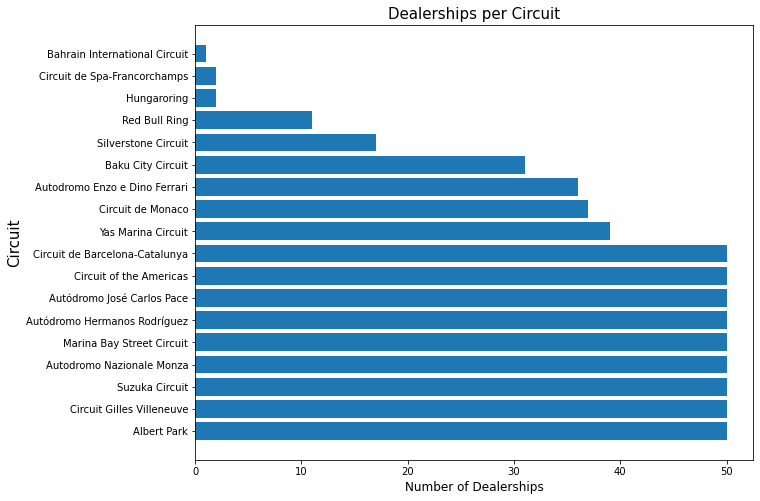

In [8]:
plt.figure(figsize=(10,8))
plt.barh(most_dealerships['Circuit'], most_dealerships['Number of Dealerships'])
plt.xlabel('Number of Dealerships', fontsize=12)
plt.ylabel('Circuit', fontsize=15)
plt.title('Dealerships per Circuit', fontsize=15)
plt.show()

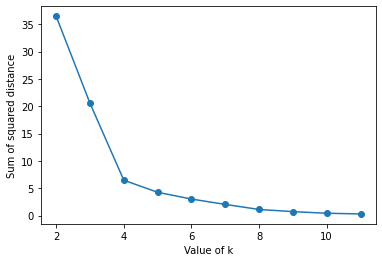

In [9]:
sse =[]
list_k = list(range(2,12))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(fd)
    sse.append(km.inertia_)

plt.plot(list_k, sse, '-o')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared distance');

In [10]:
k = 4

kmeans_clustering = KMeans(n_clusters=k, random_state=4).fit(fd)
kmeans_clustering.labels_

array([0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 3, 0, 0], dtype=int32)

In [11]:
df['Cluster'] = kmeans_clustering.labels_
df

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income,Cluster
0,Albert Park,Melbourne,AUS,Australia,271800,296600,-0.279493,-37.814218,144.963161,50,-0.446447,-0.192445,0
1,Bahrain International Circuit,Sakhir,BHR,Bahrain,92000,93000,-0.517641,32.953941,65.540016,1,1.791964,0.563628,3
2,Baku City Circuit,Baku,AZE,Azerbaijan,30000,71541,3.560643,40.375443,49.832675,31,-0.539616,-0.695342,2
3,Circuit de Barcelona-Catalunya,Montmeló,ESP,Spain,165029,177984,-0.339030,41.551519,2.248081,50,-0.507428,-0.408445,0
4,Circuit of the Americas,"Austin, TX",USA,United States,269889,258000,-0.666484,30.271129,-97.743700,50,-0.466294,-0.077266,0
5,Autodromo Enzo e Dino Ferrari,Imola,ITA,Italy,147500,185000,0.196803,44.353515,11.714123,36,-0.466834,-0.358811,0
6,Circuit Gilles Villeneuve,"Montréal, Quebec",CAN,Canada,300000,360000,0.018192,45.503182,-73.569806,50,-0.413848,-0.171929,0
7,Autódromo Hermanos Rodríguez,Mexico City,MEX,Mexico,339967,337043,-0.547410,19.432630,-99.133178,50,-0.425649,-0.664325,0
8,Hungaroring,Mogyoród,HUN,Hungary,176000,199000,-0.160419,47.603742,19.247409,2,1.959071,-0.558324,3
9,Autódromo José Carlos Pace,São Paulo,BRA,Brazil,136410,141218,-0.458104,-23.550651,-46.633382,50,-0.526350,-0.585918,0


In [12]:
df_mean = fd

df_mean['Mean'] = df_mean.mean(axis=1)
df_mean['Cluster'] = df['Cluster']
df_mean = df_mean.drop(['Growth (%)', 'Ratio', 'Income'], axis=1)
df_mean = df_mean.groupby(by='Cluster').mean()
df_mean

,Mean
Cluster,
0,-0.323489
1,0.939643
2,0.565331
3,0.603856


In [13]:
df = df.sort_values(by='Cluster').reset_index(drop=True)
df

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income,Cluster
0,Albert Park,Melbourne,AUS,Australia,271800,296600,-0.279493,-37.814218,144.963161,50,-0.446447,-0.192445,0
1,Silverstone Circuit,Silverstone,GBR,United Kingdom,350000,344500,-0.577178,52.094241,-1.022312,17,-0.077963,-0.284404,0
2,Autodromo Nazionale Monza,Monza,ITA,Italy,147500,185000,0.196803,45.639544,9.278869,50,-0.503829,-0.358811,0
3,Marina Bay Street Circuit,Singapore,SIN,Singapore,219000,260000,-0.011577,1.357107,103.819499,50,-0.465266,0.809754,0
4,Autódromo José Carlos Pace,São Paulo,BRA,Brazil,136410,141218,-0.458104,-23.550651,-46.633382,50,-0.526350,-0.585918,0
5,Suzuka Circuit,"Suzuka, Mie",JPN,Japan,145000,137000,-0.696252,34.881710,136.583652,50,-0.528510,-0.314270,0
6,Autódromo Hermanos Rodríguez,Mexico City,MEX,Mexico,339967,337043,-0.547410,19.432630,-99.133178,50,-0.425649,-0.664325,0
7,Yas Marina Circuit,Abu Dhabi,UAE,United Arab Emirates,195000,195000,-0.547410,24.453835,54.377401,39,-0.470408,-0.028783,0
8,Autodromo Enzo e Dino Ferrari,Imola,ITA,Italy,147500,185000,0.196803,44.353515,11.714123,36,-0.466834,-0.358811,0
9,Circuit of the Americas,"Austin, TX",USA,United States,269889,258000,-0.666484,30.271129,-97.743700,50,-0.466294,-0.077266,0


In [14]:
df[df['Cluster'] == 1]

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income,Cluster
12,Circuit de Monaco,Monaco,MON,Monaco,200000,200000,-0.54741,43.738449,7.424224,37,-0.459996,3.826334,1


In [15]:
df

,Circuit,Location,Country,Country Name,2016 Attendance,2017 Attendance,Growth (%),lat,long,Number of Dealerships,Ratio,Income,Cluster
0,Albert Park,Melbourne,AUS,Australia,271800,296600,-0.279493,-37.814218,144.963161,50,-0.446447,-0.192445,0
1,Silverstone Circuit,Silverstone,GBR,United Kingdom,350000,344500,-0.577178,52.094241,-1.022312,17,-0.077963,-0.284404,0
2,Autodromo Nazionale Monza,Monza,ITA,Italy,147500,185000,0.196803,45.639544,9.278869,50,-0.503829,-0.358811,0
3,Marina Bay Street Circuit,Singapore,SIN,Singapore,219000,260000,-0.011577,1.357107,103.819499,50,-0.465266,0.809754,0
4,Autódromo José Carlos Pace,São Paulo,BRA,Brazil,136410,141218,-0.458104,-23.550651,-46.633382,50,-0.526350,-0.585918,0
5,Suzuka Circuit,"Suzuka, Mie",JPN,Japan,145000,137000,-0.696252,34.881710,136.583652,50,-0.528510,-0.314270,0
6,Autódromo Hermanos Rodríguez,Mexico City,MEX,Mexico,339967,337043,-0.547410,19.432630,-99.133178,50,-0.425649,-0.664325,0
7,Yas Marina Circuit,Abu Dhabi,UAE,United Arab Emirates,195000,195000,-0.547410,24.453835,54.377401,39,-0.470408,-0.028783,0
8,Autodromo Enzo e Dino Ferrari,Imola,ITA,Italy,147500,185000,0.196803,44.353515,11.714123,36,-0.466834,-0.358811,0
9,Circuit of the Americas,"Austin, TX",USA,United States,269889,258000,-0.666484,30.271129,-97.743700,50,-0.466294,-0.077266,0


In [16]:
def find_color(cluster):
    if (cluster == 0):
        return 'yellow'
    if (cluster == 1):
        return 'green'
    if (cluster == 2):
        return 'blue'
    else:
        return 'red'

map_clusters = folium.Map(location=[37, -93], zoom_start=4)

for lat, long, cluster in zip(df['lat'], df['long'], df['Cluster']):
    folium.CircleMarker(
    [lat, long],
    color='black',
    weight=1,
    fill_color=find_color(cluster),
    fill_opacity=0.6,
    radius=10).add_to(map_clusters)

map_clusters